In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [ ]:

# Load the EEG data
fname = '/Volumes/CSC-Ido/Analyze/101/N1/Strength_101_N1_forSW.set'
raw = mne.io.read_raw_eeglab(fname, preload=True)

# Load the CSV file and exclude unclassified regions
csv_path = '/volumes/csc-ido/analyze/101/N1/output/strength_101_N1_forsw/filtered_epochs_500ms_most_negative.csv'
df = pd.read_csv(csv_path)
df = df[df['Region_Classification'] != 'Unclassified']


raw.set_montage("GSN-HydroCel-256")
print(raw.get_montage())



In [ ]:
# Set up the montage
raw.set_montage("GSN-HydroCel-256")

# Calculate overall counts for each channel
overall_count = df['Channel'].value_counts()

# Get the channel positions from the montage
pos = raw.get_montage().get_positions()['ch_pos']

# Map counts to channel names in the raw object
channel_names = raw.info['ch_names']
counts = np.array([overall_count.get(ch, 0) for ch in channel_names])

# Extract x, y coordinates for plotting
pos_x = [pos[ch][0] for ch in channel_names]
pos_y = [pos[ch][1] for ch in channel_names]
pos_2d = np.column_stack([pos_x, pos_y])



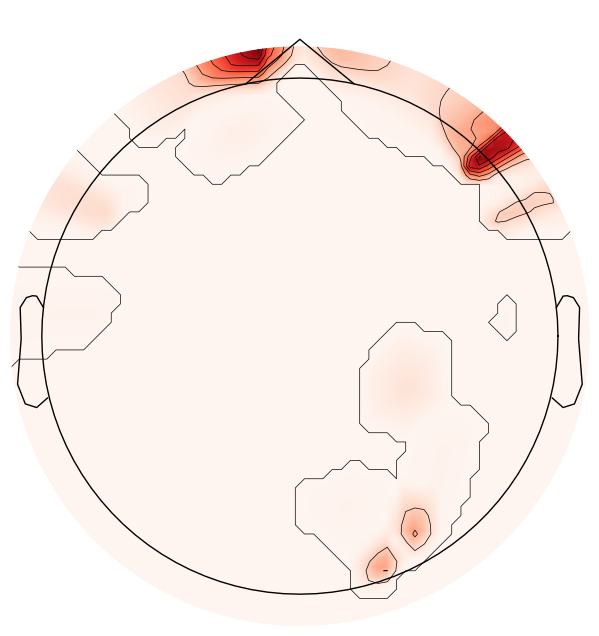

(<matplotlib.image.AxesImage at 0x2d2fc5040>,
 <matplotlib.contour.QuadContourSet at 0x2d2fc7ec0>)

In [41]:
# Plot the topomap
fig, ax = plt.subplots(figsize=(8, 8))
mne.viz.plot_topomap(counts, pos_2d, axes=ax, show=True, 
                     sensors=False,  # Show sensor locations
                     contours=6,    # Number of contour lines
                     image_interp='linear')  # Interpolation method

